<a href="https://colab.research.google.com/github/Juanesteban864/ciencia-datos-2025-b-g1-/blob/main/Proyecto.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [15]:
import pandas as pd

file_path = '/content/ventas proyecto.xlsx'
df = pd.read_excel(file_path)

display(df.head())

,saleid,productid,productname,category,saledate,unitssold,unitprice,storeid,employeeid
0,2a8c0288-ab05-436d-aa51-07eb89c8c0e6,1231,condition,Books,16/02/2024,3,40.20,36,170
1,20dd5ccc-ae8c-40ee-bf40-b43204944069,1717,understand,Books,22/09/2024,97,909.40,47,101
2,468dd687-5bbd-4419-aaab-72c035382823,1767,dream,Electronics,26/03/2024,1,736.69,5,196
3,86407510-1c85-4684-aa3e-7d4b096ff9d4,1981,out,Electronics,25/10/2023,19,816.08,11,118
4,527870a5-132f-4d95-b851-a93a5e8775a2,1544,road,Books,25/12/2023,11,5.94,5,142


In [13]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Convert 'saledate' to datetime if not already
# Assuming the format is DD/MM/YYYY, adjust if necessary
if not pd.api.types.is_datetime64_any_dtype(df['saledate']):
    df['saledate'] = pd.to_datetime(df['saledate'], format='%d/%m/%Y', errors='coerce')

# Calculate 'total_sale_value' if not already present
if 'total_sale_value' not in df.columns:
    df['total_sale_value'] = df['unitssold'] * df['unitprice']

# Drop rows where saledate might have failed conversion
df.dropna(subset=['saledate'], inplace=True)

print("Data preparation complete. 'saledate' is now datetime and 'total_sale_value' is calculated.")

Data preparation complete. 'saledate' is now datetime and 'total_sale_value' is calculated.


### 1. Tendencia de ventas diarias (Gráfico de líneas)

Este gráfico de líneas muestra el valor total de las ventas registradas cada día. Es excelente para identificar patrones, tendencias (por ejemplo, aumentos o disminuciones en las ventas) y cualquier fluctuación inusual a lo largo del tiempo. Para una empresa, esta visualización ayuda a comprender la estacionalidad, el impacto de las campañas de marketing o los factores externos en el rendimiento de las ventas.

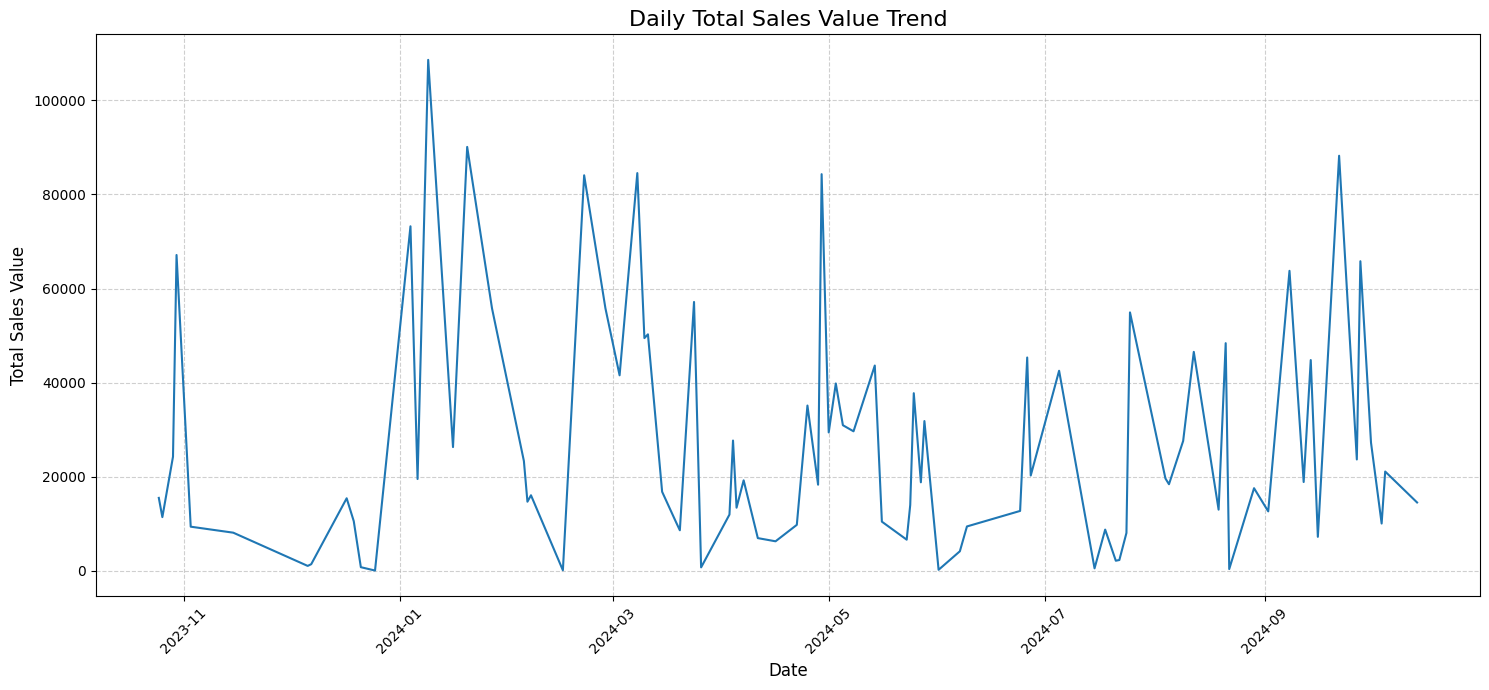

In [10]:
# Group by date and sum total_sale_value
daily_sales_trend = df.groupby('saledate')['total_sale_value'].sum().reset_index()

plt.figure(figsize=(15, 7))
sns.lineplot(x='saledate', y='total_sale_value', data=daily_sales_trend)
plt.title('Daily Total Sales Value Trend', fontsize=16)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Total Sales Value', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.6)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### 2. Los 10 productos principales por valor total de ventas (Gráfico de barras)

Este gráfico de barras muestra los 10 productos principales que generaron el mayor valor total de ventas. Es una visualización crucial para la gestión de productos, ya que ayuda a identificar los principales impulsores de ingresos. Las empresas pueden usar esta información para priorizar el inventario, las iniciativas de marketing y la planificación estratégica en torno a sus productos más rentables. Los productos que no figuran entre los 10 principales se agrupan en la categoría «Otros» para mayor claridad.

/tmp/ipython-input-172114061.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  top_products_plot.loc[len(top_products_plot)] = ['Others', others_value]
/tmp/ipython-input-172114061.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='productname', y='total_sale_value', data=top_products_plot, palette='viridis')


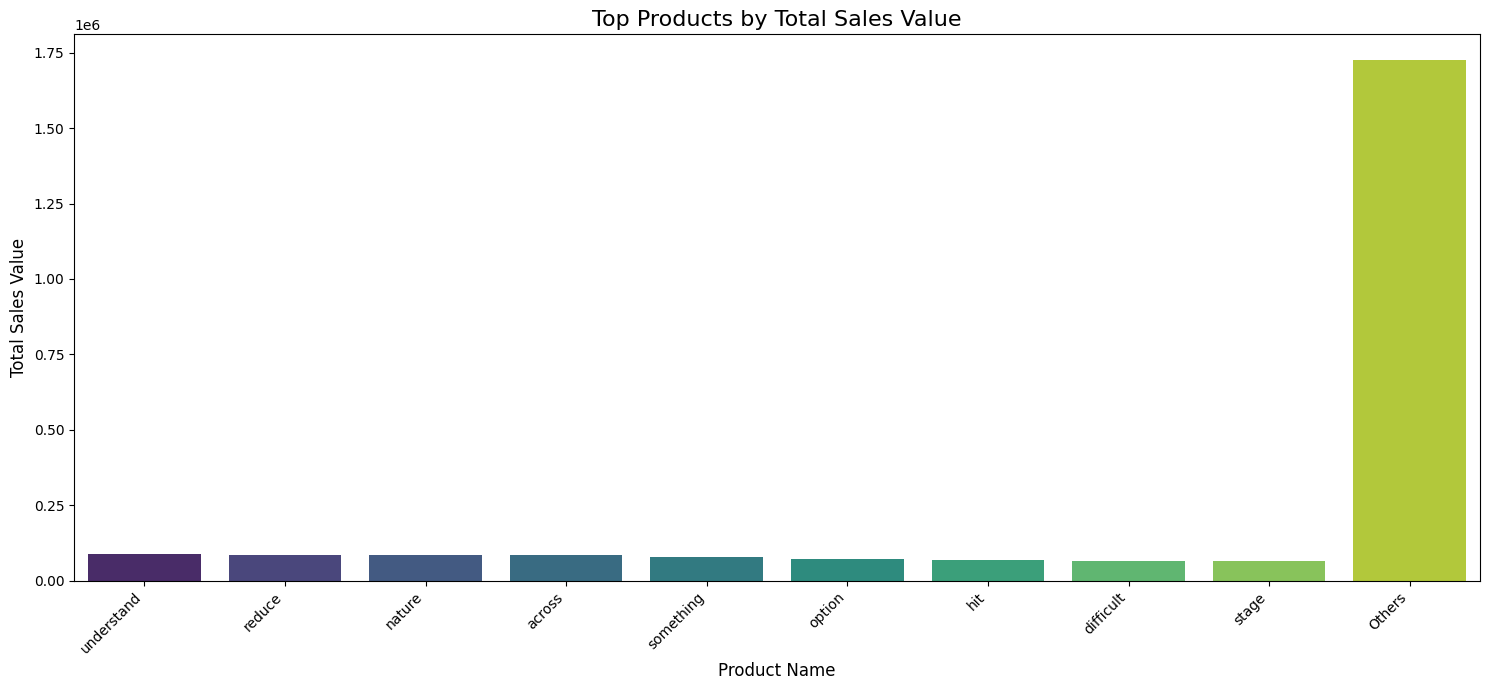

In [11]:
# Calculate total sales value per productname
product_sales_value = df.groupby('productname')['total_sale_value'].sum().reset_index()
product_sales_value_sorted = product_sales_value.sort_values(by='total_sale_value', ascending=False)

# Select top 10 products and group others
top_n = 10
if len(product_sales_value_sorted) > top_n:
    top_products_plot = product_sales_value_sorted.head(top_n - 1)
    others_value = product_sales_value_sorted.iloc[top_n - 1:]['total_sale_value'].sum()
    top_products_plot.loc[len(top_products_plot)] = ['Others', others_value]
else:
    top_products_plot = product_sales_value_sorted

plt.figure(figsize=(15, 7))
sns.barplot(x='productname', y='total_sale_value', data=top_products_plot, palette='viridis')
plt.title('Top Products by Total Sales Value', fontsize=16)
plt.xlabel('Product Name', fontsize=12)
plt.ylabel('Total Sales Value', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

### 3. Distribución de ventas por categoría (Gráfico de barras)

Este gráfico de barras ilustra el valor total de ventas para cada categoría de producto. Ofrece una visión general de qué segmentos de productos tienen mejor desempeño y cuáles podrían requerir atención. Esto ayuda a las empresas a comprender su posicionamiento en el mercado en las diferentes categorías y puede orientar las decisiones sobre la asignación de recursos, el desarrollo de productos y las estrategias de ventas.

/tmp/ipython-input-1981200908.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='category', y='total_sale_value', data=category_sales_value_sorted, palette='magma')


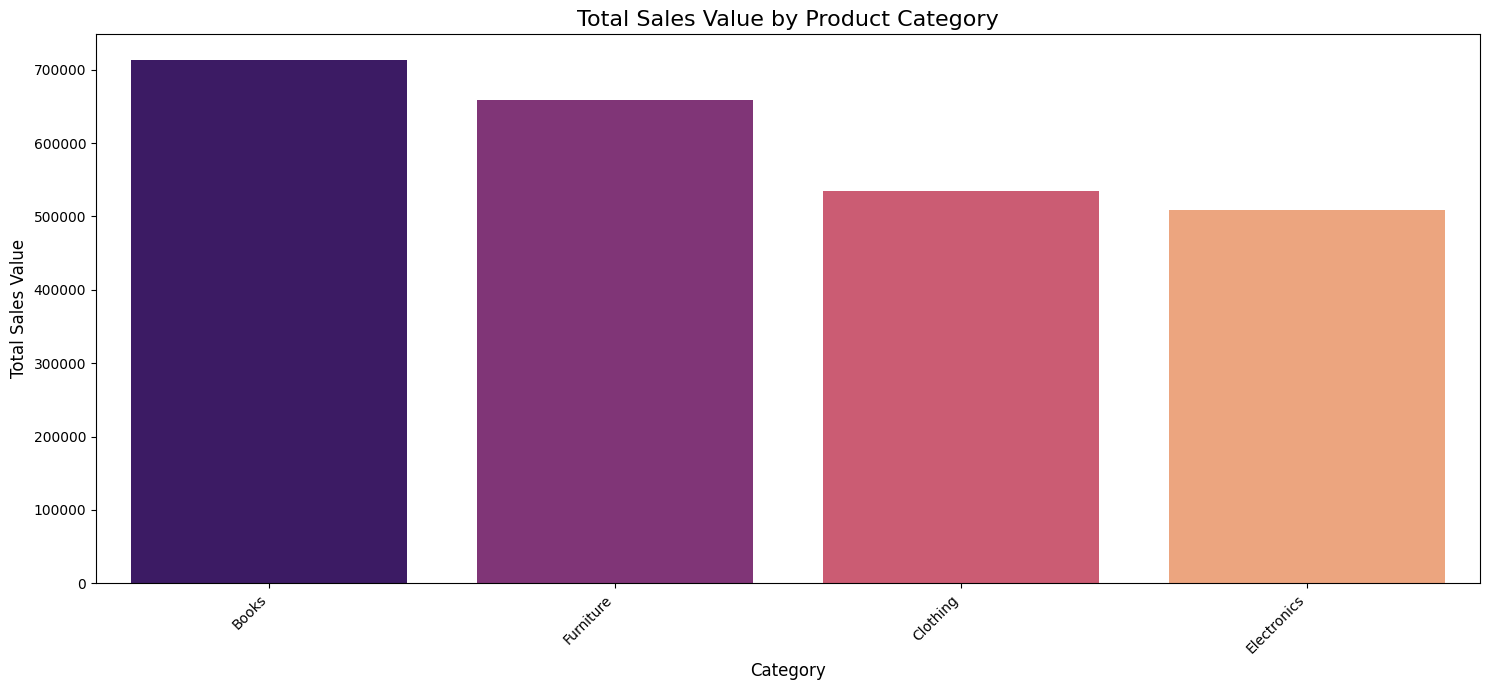

In [14]:
# Calculate total sales value per category
category_sales_value = df.groupby('category')['total_sale_value'].sum().reset_index()
category_sales_value_sorted = category_sales_value.sort_values(by='total_sale_value', ascending=False)

plt.figure(figsize=(15, 7))
sns.barplot(x='category', y='total_sale_value', data=category_sales_value_sorted, palette='magma')
plt.title('Total Sales Value by Product Category', fontsize=16)
plt.xlabel('Category', fontsize=12)
plt.ylabel('Total Sales Value', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()